# Problem Description

ABC Bank wants to sell its term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

# Importing the Data

In [136]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Import and view the dataset
df = pd.read_csv('https://raw.githubusercontent.com/agbaysa/dataglacier_week7/main/bank-additional-full.csv', sep=";")
df.head(3)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]

In [137]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [138]:
# Check for missing values
print('Data columns with null values:',df.isnull().sum(), sep = '\n')

Data columns with null values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


We will now use `pandas-profiling` to profile the dataset in terms of the following:
* Number of Variables
* Number of observations
* Missing Data
* Duplicate Rows
* Data size
* Data Types
* Distribution of Continuous Features
* Cardinality of Categorical Features
* Correlations of Continuous Features

In [139]:
# Data profiling
# import pandas_profiling
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df)
# profile

# Data Cleansing and Features Engineering

In [140]:
# Drop the duration column as required
df.drop(['duration'], axis=1, inplace=True)
df.info()

# Drop duplicates
duplicated_rows = df[df.duplicated()]
print('Number of duplicated rows:', duplicated_rows.shape[0])

df.drop_duplicates(inplace = True)
print(df.shape)


# Select numeric and non-numeric columns
cat_vars = df.select_dtypes(include='object').columns
num_vars = df.select_dtypes(exclude='object').columns
print(cat_vars)

# Do label encoding
# from sklearn.preprocessing import LabelEncoder
# df[cat_vars] = df[cat_vars].apply(LabelEncoder().fit_transform)
# df.head(3)

# Convert target variable to numeric; 
def target_variable_binary(y):
    df['y'] = df['y'].replace({"yes":1,"no":0},inplace=True)

# Check label-encoded categorical columns
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no

In [141]:
# Selective label encoding of categorical features
# cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
from sklearn.preprocessing import LabelEncoder

# job: nominal labelling
dict_job = {'blue-collar': 0, 'management': 1, 'technician': 2, 'admin.': 3, 'services': 4,
            'entrepreneur': 5, 'unknown': 5, 'retired': 5, 'self-employed': 5, 'unemployed': 5,
            'housemaid': 5, 'student': 5}
df.replace({'job':dict_job}, inplace=True)

In [142]:
# marital: nominal labelling
dict_marital = {'single': 0, 'married':1, 'divorced':2, 'unknown': 4}
df.replace({'marital':dict_marital}, inplace=True)

In [143]:
# education: nominal labelling
dict_education = {'university.degree': 0, 'high.school': 1, 'basic.9y': 2, 'professional.course': 2, 'basic.4y': 2,
                  'basic.6y': 2, 'unknown': 2, 'illiterate': 2}
df.replace({'education':dict_education}, inplace=True)

In [144]:
# default: nominal labelling
dict_default = {'no': 0, 'yes': 1, 'unknown': 2}
df.replace({'default':dict_default}, inplace=True)

In [145]:
# housing: nominal labelling
dict_housing = {'no': 0, 'yes': 1, 'unknown': 2}
df.replace({'housing':dict_default}, inplace=True)

In [146]:
# loan: nominal labelling
dict_loan = {'no': 0, 'yes': 1, 'unknown': 2}
df.replace({'loan':dict_loan}, inplace=True)

In [147]:
# contact: nominal labelling
dict_contact = {'cellular': 0, 'telephone': 1}
df.replace({'contact':dict_contact}, inplace=True)

In [148]:
# month: nominal labelling
dict_month = {'jan': 1, 'feb': 2,'mar': 3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df.replace({'month':dict_month}, inplace=True)

In [149]:
# campaign: Classify campaign 6 and above as 6 to minimize cardinality
df['campaign'].loc[df['campaign']>=6] = 6

In [150]:
# poutcome: nominal labelling
dict_poutcome = {'nonexistent': 0, 'failure': 1, 'success': 2}
df.replace({'poutcome':dict_poutcome}, inplace=True)

In [151]:
# y: nominal labelling
dict_y = {'no': 0, 'yes': 1}
df.replace({'y':dict_y}, inplace=True)

In [152]:
# Encoding pdays by aging buckets
df['pdays'].loc[df['pdays'].between(-999, 0)] = 0
df['pdays'].loc[df['pdays'].between(1, 60)] = 1
df['pdays'].loc[df['pdays'].between(61, 9999)] = 2

In [153]:
# day_of_week: nominal labelling
dict_dow = {'mon': 1, 'tue': 2, 'wed':3, 'thu':4,'fri':5}
df.replace({'day_of_week':dict_dow}, inplace=True)

In [154]:
# age binning
df['age'].loc[df['age'].between(0, 20)] = 0
df['age'].loc[df['age'].between(21, 30)] = 1
df['age'].loc[df['age'].between(31, 40)] = 2
df['age'].loc[df['age'].between(41, 50)] = 3
df['age'].loc[df['age'].between(51, 60)] = 4
df['age'].loc[df['age'].between(61, 70)] = 5
df['age'].loc[df['age'].between(71, 999)] = 6

In [155]:
# Create _econ_idx which is the product of cons.price.idx, cons.conf.idx, euribor3m
df['_econ_idx'] = df['cons.price.idx'] * df['cons.conf.idx'] * df['euribor3m'] 

In [156]:
# Drop cons.price.idx, cons.conf.idx, euribor3m
df.drop(['cons.price.idx', 'cons.conf.idx', 'euribor3m'], axis=1, inplace=True)

In [196]:
# Use StandardScaler for _econ_index
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# pd_data[["ScaledPrice"]] = scaler.fit_transform(pd_data[["Price"]])
df['_econ_idx'] = scaler.fit_transform(df[["_econ_idx"]])

In [197]:
df.head(3)

age  job  marital  education  default  housing  loan  contact  month  \
0    4    5        1          2        0        0     0        1      5   
1    4    4        1          1        2        0     0        1      5   
2    2    4        1          1        0        1     0        1      5   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1         1      2         0         0           1.1   
1            1         1      2         0         0           1.1   
2            1         1      2         0         0           1.1   

   nr.employed  y  _econ_idx  
0       5191.0  0  -0.494764  
1       5191.0  0  -0.494764  
2       5191.0  0  -0.494764

In [131]:
# df.corr()

In [132]:
# Check result of features engineering
df.head(3)

age  job  marital  education  default  housing  loan  contact  month  \
0    4    5        1          2        0        0     0        1      5   
1    4    4        1          1        2        0     0        1      5   
2    2    4        1          1        0        1     0        1      5   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  y  \
0            1         1      2         0         0           1.1  0   
1            1         1      2         0         0           1.1  0   
2            1         1      2         0         0           1.1  0   

      _econ_idx  
0 -16617.650431  
1 -16617.650431  
2 -16617.650431

# Modeling for Feature Importance

The following step initially measures base models and determine feature importance for exploratory data analysis. 

In [198]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import sklearn.metrics as metrics


models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LDA', LinearDiscriminantAnalysis()))

In [199]:
# Create X and y
X = df.drop('y', axis=1)
y = df.y

# Create train and test data for selected features only and stratify the target variable
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=6, stratify=y)

In [200]:
# Set parameters
num_folds = 10
seed = 6
scoring = 'roc_auc'

# Results using default parameters using roc-auc as a metric
results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# Base metrics
# RFC: 0.765757 (0.016179)
# KNN: 0.723905 (0.013886)
# CART: 0.613057 (0.014499)
# LR: 0.766725 (0.019735)
# NB: 0.765014 (0.015048)
# SVM: 0.464978 (0.220556)
# LDA: 0.779020 (0.016154)

# ROC-AUC: Created scaled _econ_idx and removed 'cons.price.idx', 'cons.conf.idx', 'euribor3m' only
# RFC: 0.763115 (0.015470)
# KNN: 0.721136 (0.010613)
# CART: 0.615689 (0.013116)
# LR: 0.763262 (0.015036)
# NB: 0.763627 (0.015334)
# SVM: 0.456955 (0.230262)
# LDA: 0.780104 (0.015634)

RFC: 0.763115 (0.015470)
KNN: 0.721136 (0.010613)
CART: 0.615689 (0.013116)
LR: 0.763262 (0.015036)
NB: 0.763627 (0.015334)
SVM: 0.456955 (0.230262)
LDA: 0.780104 (0.015634)


In [201]:
# Results using default parameters using accuracy as a metric
scoring = 'accuracy'

results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

  # Base model
# RFC: 0.883656 (0.004591)
# KNN: 0.882786 (0.005561)
# CART: 0.836995 (0.007184)
# LR: 0.890399 (0.006748)
# NB: 0.832717 (0.008916)
# SVM: 0.883294 (0.005729)
# LDA: 0.890798 (0.003981)

# Accuracy: Created scaled _econ_idx and removed 'cons.price.idx', 'cons.conf.idx', 'euribor3m' only
# RFC: 0.883294 (0.004959)
# KNN: 0.886121 (0.004403)
# CART: 0.835183 (0.006168)
# LR: 0.892068 (0.006630)
# NB: 0.835980 (0.009151)
# SVM: 0.883294 (0.005729)
# LDA: 0.890146 (0.004962)

RFC: 0.883294 (0.004959)
KNN: 0.886121 (0.004403)
CART: 0.835183 (0.006168)
LR: 0.892068 (0.006630)
NB: 0.835980 (0.009151)
SVM: 0.883294 (0.005729)
LDA: 0.890146 (0.004962)


## Logistic *Regression*

In [202]:
# Log Regression
import numpy as np

param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("Mean accuracy of Logistic Regression:",best_model.score(X_valid,y_valid))

LogisticRegression(C=51.79474679231202, random_state=0)
Mean accuracy of Logistic Regression: 0.8902892911520893


In [203]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_valid)
print('Accuracy of logistic regression: {:.2f}'.format(logreg.score(X_valid, y_valid)))

Accuracy of logistic regression: 0.89


In [204]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_valid, y_pred))

Confusion Matrix:
 [[10333   110]
 [ 1136   243]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     10443
           1       0.69      0.18      0.28      1379

    accuracy                           0.89     11822
   macro avg       0.79      0.58      0.61     11822
weighted avg       0.88      0.89      0.87     11822



In [205]:
pd.DataFrame(y_valid).value_counts()

y
0    10443
1     1379
dtype: int64

# Exploratory Data Analysis

The following EDA approach is done:
* First, a `RandomForestClassifier` is used to determine the feature importance 
* `pandas-profiling` is again used on the processed data to identify skewness, cardinality, interactions, and correlations

In [209]:
import numpy as np
import pandas as pd

from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

In [210]:
# Train RandomForestRegressor
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

Text(0.5, 0, 'Feature Importance - RandomForestClassifier')

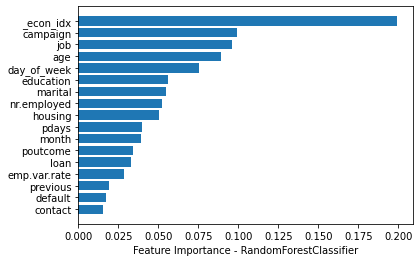

In [211]:
sort = rfc.feature_importances_.argsort()
plt.barh(X_train.columns[sort], rfc.feature_importances_[sort])
plt.xlabel("Feature Importance - RandomForestClassifier")

The graph above shows the importance of `_econ_idx`, `campaign`, `job`, `age`, `day_of_week`, `education` and `marital` as the top features that influence the model.

As such, the following hypothesis were derived based on the top features:
* The target variable and `_econ_idx` has a linear relationship
* The lower the `campaign`, the more likely the customer will subscribe to a term deposit
* Those with white-collared jobs are more likely to subscribe
* Senior customers are more like to subscribe
* Clients mostly subscribe on the first day of the week (Monday)
* Customers with a higher education are more likely to avail
* Married individuals are more likely to avail 

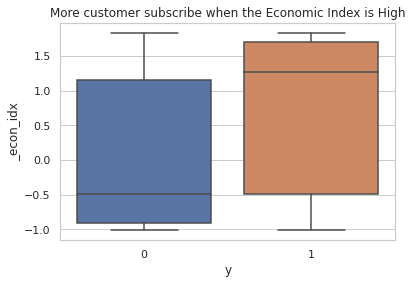

In [220]:
# The target variable and _econ_idx has a linear relationship
import seaborn as sb

sb.boxplot( y=df["_econ_idx"], x=df["y"])
plt.title('More customer subscribe when the Economic Index is High')
plt.show()

The boxplot above shows that when the Economic Index averages above 1.0, more customers subscribe to the term deposit.

In [225]:
# The lower the campaign, the more likely the customer will subscribe to a term deposit
import plotly.express as px
fig = px.treemap(df, path=['campaign','y'], title = 'Most clients need to only be contacted once; Success Rate is highest at 13.87%' )
fig.show()

In [222]:
foo = pd.crosstab(df.campaign, df.y, values=df.y, aggfunc='count').reset_index()
foo.rename(columns={0:'no',1: 'yes'}, inplace=True)
foo['percent'] = (foo['yes'] / (foo['no'] + foo['yes'])*100).round(2)
foo.sort_values('yes', ascending=False)

y  campaign     no   yes  percent
0         1  14098  2270    13.87
1         2   9022  1201    11.75
2         3   4658   572    10.94
3         4   2376   249     9.49
5         6   3186   186     5.52
4         5   1466   120     7.57

In [231]:
# Those with white-collared jobs are more likely to subscribe
# Mapping: {'blue-collar': 0, 'management': 1, 'technician': 2, 'admin.': 3, 'services': 4,
#             'entrepreneur': 5, 'unknown': 5, 'retired': 5, 'self-employed': 5, 'unemployed': 5,
#             'housemaid': 5, 'student': 5}

fig = px.treemap(df, path=['job','y'], title = 'Entrepreneurs, Admins, and Managerial Jobs have higher Success Rates (11% to 16%)' )
fig.show()

In [227]:
foo = pd.crosstab(df.job, df.y, values=df.y, aggfunc='count').reset_index()
foo.rename(columns={0:'no',1: 'yes'}, inplace=True)
foo['percent'] = (foo['yes'] / (foo['no'] + foo['yes'])*100).round(2)
foo.sort_values('yes', ascending=False)

y  job    no   yes  percent
3    3  8538  1335    13.52
5    5  6416  1255    16.36
2    2  5677   727    11.35
0    0  8202   633     7.16
1    1  2494   326    11.56
4    4  3479   322     8.47

In [239]:
# Senior customers are more like to subscribe
# Mapping: 
# df['age'].loc[df['age'].between(0, 20)] = 0
# df['age'].loc[df['age'].between(21, 30)] = 1
# df['age'].loc[df['age'].between(31, 40)] = 2
# df['age'].loc[df['age'].between(41, 50)] = 3
# df['age'].loc[df['age'].between(51, 60)] = 4
# df['age'].loc[df['age'].between(61, 70)] = 5
# df['age'].loc[df['age'].between(71, 999)] = 6

fig = px.treemap(df, path=['age','y'], title = 'Customers ages 61 and above and those below 21 years old have higher Success Rates (above 40%)' )
fig.show()

In [232]:
foo = pd.crosstab(df.age, df.y, values=df.y, aggfunc='count').reset_index()
foo.rename(columns={0:'no',1: 'yes'}, inplace=True)
foo['percent'] = (foo['yes'] / (foo['no'] + foo['yes'])*100).round(2)
foo.sort_values('yes', ascending=False)

y  age     no   yes  percent
2    2  13997  1583    10.16
1    1   5812  1052    15.33
3    3   9012   832     8.45
4    4   5418   666    10.95
5    5    273   210    43.48
6    6    213   198    48.18
0    0     81    57    41.30

In [238]:
# Clients mostly subscribe on the first day of the week (Monday)
fig = px.treemap(df, path=['day_of_week','y'], title = 'Success Rates are slightly higher during midweek (Tue to Thu at above 12%)' )
fig.show()

In [234]:
foo = pd.crosstab(df.day_of_week, df.y, values=df.y, aggfunc='count').reset_index()
foo.rename(columns={0:'no',1: 'yes'}, inplace=True)
foo['percent'] = (foo['yes'] / (foo['no'] + foo['yes'])*100).round(2)
foo.sort_values('yes', ascending=False)

y  day_of_week    no   yes  percent
3            4  7160  1037    12.65
1            2  6763   945    12.26
2            3  6826   934    12.04
0            1  7346   842    10.28
4            5  6711   840    11.12

In [241]:
# Customers with a higher education are more likely to avail
# Mapping: {'university.degree': 0, 'high.school': 1, 'basic.9y': 2, 'professional.course': 2, 'basic.4y': 2,
                  # 'basic.6y': 2, 'unknown': 2, 'illiterate': 2}

fig = px.treemap(df, path=['education','y'], title = 'Those with university degrees have a higher Success Rate (14%)' )
fig.show()

In [240]:
foo = pd.crosstab(df.education, df.y, values=df.y, aggfunc='count').reset_index()
foo.rename(columns={0:'no',1: 'yes'}, inplace=True)
foo['percent'] = (foo['yes'] / (foo['no'] + foo['yes'])*100).round(2)
foo.sort_values('yes', ascending=False)

y  education     no   yes  percent
2          2  16798  1924    10.28
0          0   9910  1651    14.28
1          1   8098  1023    11.22

In [243]:
# Married individuals are more likely to avail
# Mapping: {'single': 0, 'married':1, 'divorced':2, 'unknown': 4}

fig = px.treemap(df, path=['marital','y'], title = 'Single individuals have a higher Success Rate (14%)' )
fig.show()

In [242]:
foo = pd.crosstab(df.marital, df.y, values=df.y, aggfunc='count').reset_index()
foo.rename(columns={0:'no',1: 'yes'}, inplace=True)
foo['percent'] = (foo['yes'] / (foo['no'] + foo['yes'])*100).round(2)
foo.sort_values('yes', ascending=False)

y  marital     no   yes  percent
1        1  21353  2516    10.54
0        0   9399  1598    14.53
2        2   3987   472    10.59
3        4     67    12    15.19

As mentioned, we will use `pandas-profiling` again on the engineered dataset.

In [244]:
# Data profiling on engineered data

import pandas_profiling
from pandas_profiling import ProfileReport

profile2 = ProfileReport(df)
profile2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]